In [184]:
import pandas as pd

In [185]:
df = pd.read_csv("customer_churn_data.csv")

In [186]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [187]:
df.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


## Part 1: EDA

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [189]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [190]:
df.isna().sum().sum()

297

In [191]:
df["InternetService"] = df["InternetService"].fillna("") #Fill w/ empty string

In [192]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [193]:
df.isna().sum().sum()

0

In [194]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [195]:
df.duplicated().sum()

0

In [196]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [197]:
#selects only the numeric columns (like int, float) from the DataFrame df and stores them in numeric_columns_data.
numeric_columns_data = df.select_dtypes( include = ["number"])

This calculates the correlation matrix between all numeric columns in the DataFrame.

Output: A table showing how strongly each pair of numeric columns is related (values from -1 to 1).

1 = perfect positive correlation

-1 = perfect negative correlation (Indirectly proportional)

0 = no correlation

In [198]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [199]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [200]:
import matplotlib.pyplot as plt

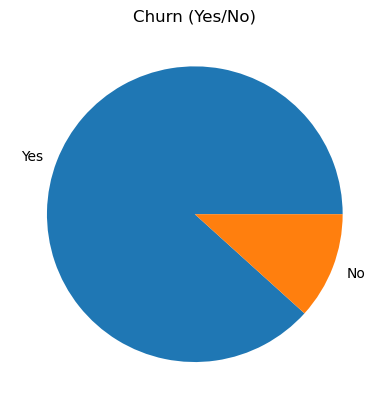

In [201]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

It groups the data by the Churn column and calculates the average MonthlyCharges for each group (Churn = Yes and No).

In [202]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

Multi-index Groupby

In [203]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [204]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [205]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [206]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [207]:
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

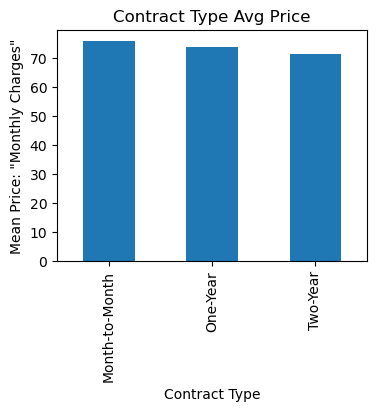

In [208]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar", figsize=(4,3))
plt.ylabel('Mean Price: "Monthly Charges"') #Notes this syntax for doublw quotes
plt.xlabel("Contract Type")
plt.title("Contract Type Avg Price")
plt.show()


In [209]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


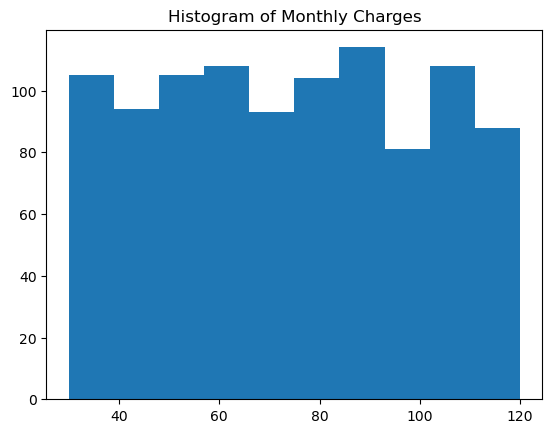

In [210]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

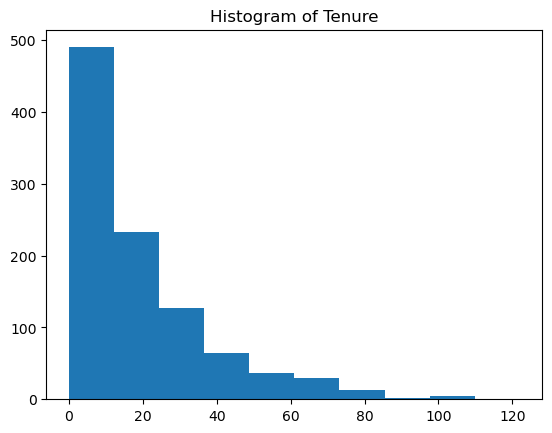

In [211]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [212]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


## Part 2: Feature Engineering

In [213]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [214]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [215]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [216]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


Ecoding: Changing String to Numeric value of test variable, x

One-hot encoding converts categorical values into binary (0/1) columns, one for each unique category.

In [217]:
X["Gender"] = X["Gender"].apply(lambda x:1 if x == "Female" else 0)

In [218]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [219]:
type(X["Gender"][0])

numpy.int64

In [220]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [221]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0 )

In [222]:
type(y["Churn"][0])

numpy.int64

Train Test Split

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [225]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


Scaling: Scaling means adjusting numeric values to a common range (like 0–1) so features contribute equally to a model

Normalization is a type of scaling where values are typically scaled to a [0, 1] range using:

All normalization is scaling.
But not all scaling is normalization (e.g., Standardization scales to mean 0, std 1)

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()

In [228]:
X_train = scaler.fit_transform(X_train)

Step to prevent Data Leakage from X_train to X_test:

In [229]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [230]:
X_test = scaler.fit_transform(X_test)

Building Classification Model

What it does:
Takes predictions from your model

Compares them with y_test (true labels)

Prints the accuracy, which tells how many predictions were correct out of all

In [231]:
# Import the function to calculate accuracy
from sklearn.metrics import accuracy_score 

# Define a function to check how well a model performed
def modelperformance(predictions):
    # Calculate and print the accuracy score between actual and predicted values
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

GridSearchCV helps you find the best combination of parameters for your machine learning model.

It tries out different values (in a grid) and uses cross-validation to test which combination gives the best performance.

In [232]:
from sklearn.model_selection import GridSearchCV

Training the Model

01. Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
log_model = LogisticRegression()

How to not see warnings:

In [235]:
import warnings
warnings.filterwarnings("ignore")

In [236]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [237]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


This is just the long form of the next step

In [238]:
log_model.predict([[40,0,20,80]])[0]

1

In [239]:
y_pred = log_model.predict(X_test)

In [240]:
modelperformance(y_pred)

Accuracy score on model is 0.88


02. KNN

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [242]:
param_grid = {
    "n_neighbors": [3,5,7],
    "weights": ["uniform", "distance"]
}

What it does:
KNeighborsClassifier() is the model we’re tuning.

param_grid is a dictionary with parameter options to test (like n_neighbors values).

cv=5 means it uses 5-fold cross-validation to check which parameters perform best.

In [243]:
# Create a GridSearchCV object to find the best parameters for KNeighborsClassifier
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [244]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

Checking the best parameters

In [245]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [246]:
y_pred = gridkn.predict(X_test) #This means ask the model to now predict the target value based on X_test variables

In [247]:
modelperformance(y_pred)

Accuracy score on model is 0.84


03. SVM

In [248]:
from sklearn.svm import SVC

Initializing the Model

In [249]:
svm = SVC()

In [250]:
param_grid = {
    "C" : [0.01, 0.1, 0.5,1],
    "kernel": ["linear", "rbf", "poly"]
}

In [251]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [252]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [253]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [254]:
y_pred = gridsvc.predict(X_test)

In [255]:
modelperformance(y_pred)

Accuracy score on model is 0.875


04. Decision Tree Classifier

In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [258]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [259]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [260]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [261]:
y_pred = grid_tree.predict(X_test)

In [262]:
modelperformance(y_pred)

Accuracy score on model is 0.775


05. Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [272]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]

}

In [273]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [274]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [278]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [276]:
y_pred = grid_rfc.predict(X_test)

In [277]:
modelperformance(y_pred)

Accuracy score on model is 0.815


Since SVM has the best performance of all, we will call that

In [279]:
best_model = gridsvc.best_estimator_

Why it's used:

joblib is efficient for saving large NumPy arrays or models (better than pickle for large objects).

This saved .pkl file can later be loaded and reused without retraining the model.

In [280]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

Just to get order of X

In [282]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')